# Get started with Autoconfig


In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../.")

### Display original image

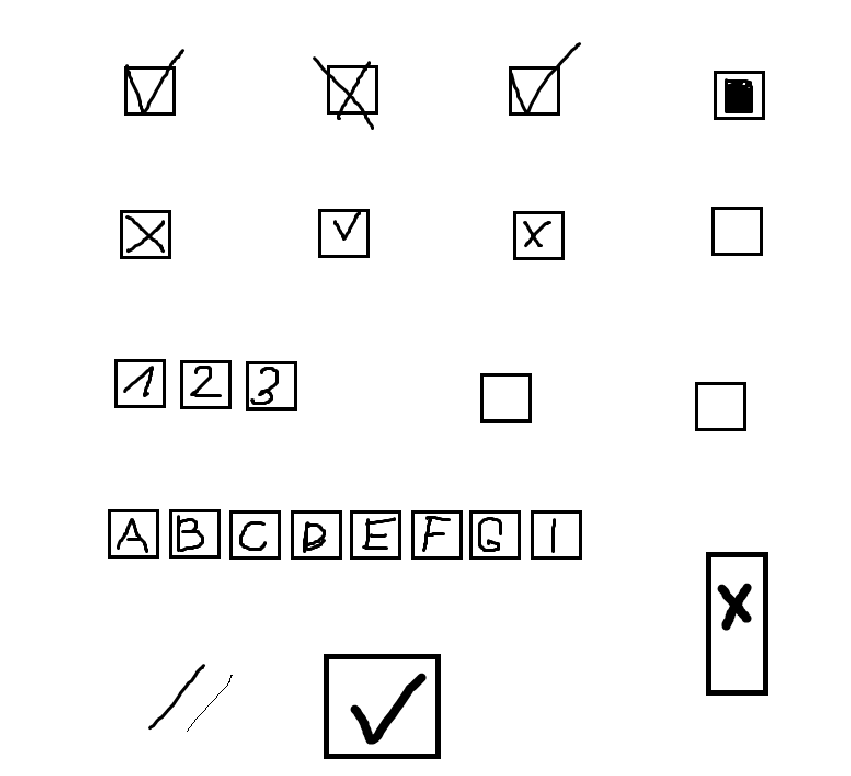

In [21]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

file_path = '../tests/data/autoconfig_simple/dummy_example.png'

input_image = cv2.imread(file_path)
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(input_image)
plt.show()

# Search for small checkboxes using autoconfig (by manually providing box sizes) 

In [26]:
from boxdetect import config

cfg = config.PipelinesConfig()

# The values I'm providing below is a list of box sizes I'm interested in and want to focus on
# [(h, w), (h, w), ...]
cfg.autoconfigure([(46, 46), (44, 43)])

### Use `get_boxes` pipeline to easily get your results

In [27]:
from boxdetect.pipelines import get_checkboxes

checkboxes = get_checkboxes(file_path, cfg=cfg, plot=False)

Processing file:  ../tests/data/autoconfig_simple/dummy_example.png


Output object type:  <class 'numpy.ndarray'>
Checkbox bounding rectangle (x,y,width,height):  (108, 56, 46, 45)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


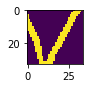

Checkbox bounding rectangle (x,y,width,height):  (293, 55, 46, 45)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


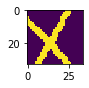

Checkbox bounding rectangle (x,y,width,height):  (460, 57, 44, 42)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


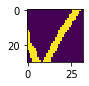

Checkbox bounding rectangle (x,y,width,height):  (646, 60, 46, 45)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


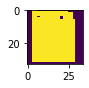

Checkbox bounding rectangle (x,y,width,height):  (104, 187, 46, 45)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


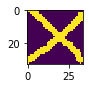

Checkbox bounding rectangle (x,y,width,height):  (285, 186, 46, 45)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


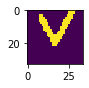

Checkbox bounding rectangle (x,y,width,height):  (463, 188, 46, 45)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


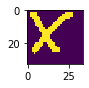

Checkbox bounding rectangle (x,y,width,height):  (644, 184, 46, 45)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


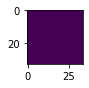

Checkbox bounding rectangle (x,y,width,height):  (433, 336, 46, 45)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


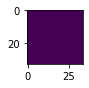

Checkbox bounding rectangle (x,y,width,height):  (629, 344, 46, 45)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


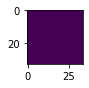

In [28]:
print("Output object type: ", type(checkboxes))
for checkbox in checkboxes:
    print("Checkbox bounding rectangle (x,y,width,height): ", checkbox[0])
    print("Result of `contains_pixels` for the checkbox: ", checkbox[1])
    print("Display the cropout of checkbox:")
    plt.figure(figsize=(1,1))
    plt.imshow(checkbox[2])
    plt.show()

### Display image with detected boxes

Processing file:  ../tests/data/autoconfig_simple/dummy_example.png


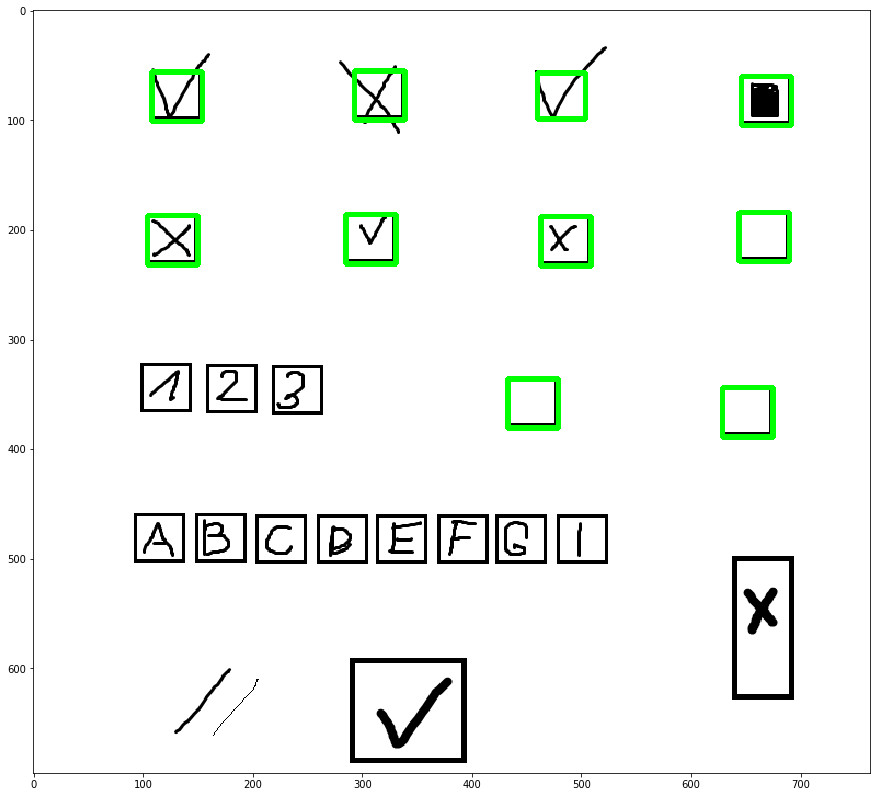

In [29]:
from boxdetect.img_proc import draw_rects, get_image
import matplotlib.pyplot as plt
%matplotlib inline

out_img = draw_rects(get_image(file_path), checkboxes[:,0], thickness=3)

plt.figure(figsize=(15,20))
plt.imshow(out_img)
plt.show()

# Search for all checkboxes using autoconfig (by using annotations from VoTT) 

Check VoTT repo and docs on how to create a new project and start labelling your data: https://github.com/microsoft/VoTT

For this example I used VoTT to label my input image and my VoTT project looks somewhat like that:

![](../images/vott1.jpg)

In [30]:
from boxdetect import config

cfg = config.PipelinesConfig()

cfg.autoconfigure_from_vott(
    vott_dir="../tests/data/autoconfig_simple", class_tags=["box"])

In [31]:
from boxdetect.pipelines import get_checkboxes

checkboxes = get_checkboxes(
    file_path, cfg=cfg, px_threshold=0.1, plot=False, verbose=True)

Processing file:  ../tests/data/autoconfig_simple/dummy_example.png
----------------------------------
nonzero_px_count:  224
all_px_count:  960
nonzero_px_count / all_px_count =  0.23333333333333334
----------------------------------
----------------------------------
nonzero_px_count:  257
all_px_count:  1056
nonzero_px_count / all_px_count =  0.24337121212121213
----------------------------------
----------------------------------
nonzero_px_count:  193
all_px_count:  960
nonzero_px_count / all_px_count =  0.20104166666666667
----------------------------------
----------------------------------
nonzero_px_count:  795
all_px_count:  1056
nonzero_px_count / all_px_count =  0.7528409090909091
----------------------------------
----------------------------------
nonzero_px_count:  320
all_px_count:  1056
nonzero_px_count / all_px_count =  0.30303030303030304
----------------------------------
----------------------------------
nonzero_px_count:  159
all_px_count:  1056
nonzero_px_count 

### Looking into the results

Output object type:  <class 'numpy.ndarray'>
Checkbox bounding rectangle (x,y,width,height):  (109, 57, 44, 42)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


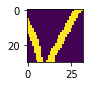

In [ ]:
print("Output object type: ", type(checkboxes))
for checkbox in checkboxes:
    print("Checkbox bounding rectangle (x,y,width,height): ", checkbox[0])
    print("Result of `contains_pixels` for the checkbox: ", checkbox[1])
    print("Display the cropout of checkbox:")
    plt.figure(figsize=(1,1))
    plt.imshow(checkbox[2])
    plt.show()

### Display image with detected boxes

Processing file:  ../tests/data/dummy_example.png


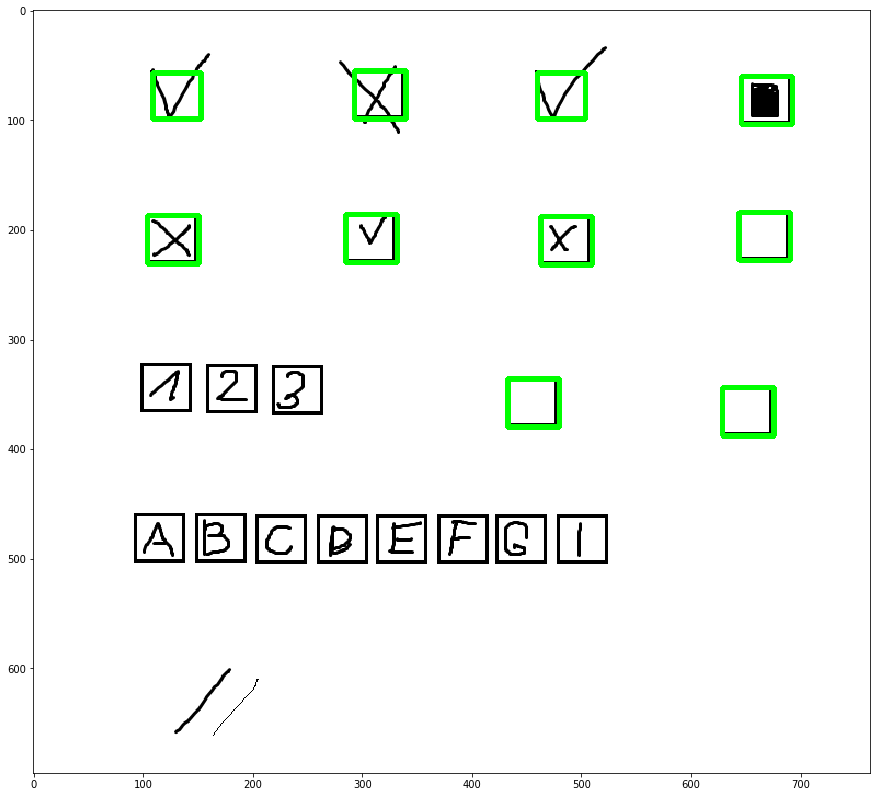

In [20]:
from boxdetect.img_proc import draw_rects, get_image
import matplotlib.pyplot as plt
%matplotlib inline

out_img = draw_rects(get_image(file_path), checkboxes[:,0], thickness=3)

plt.figure(figsize=(15,20))
plt.imshow(out_img)
plt.show()